<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

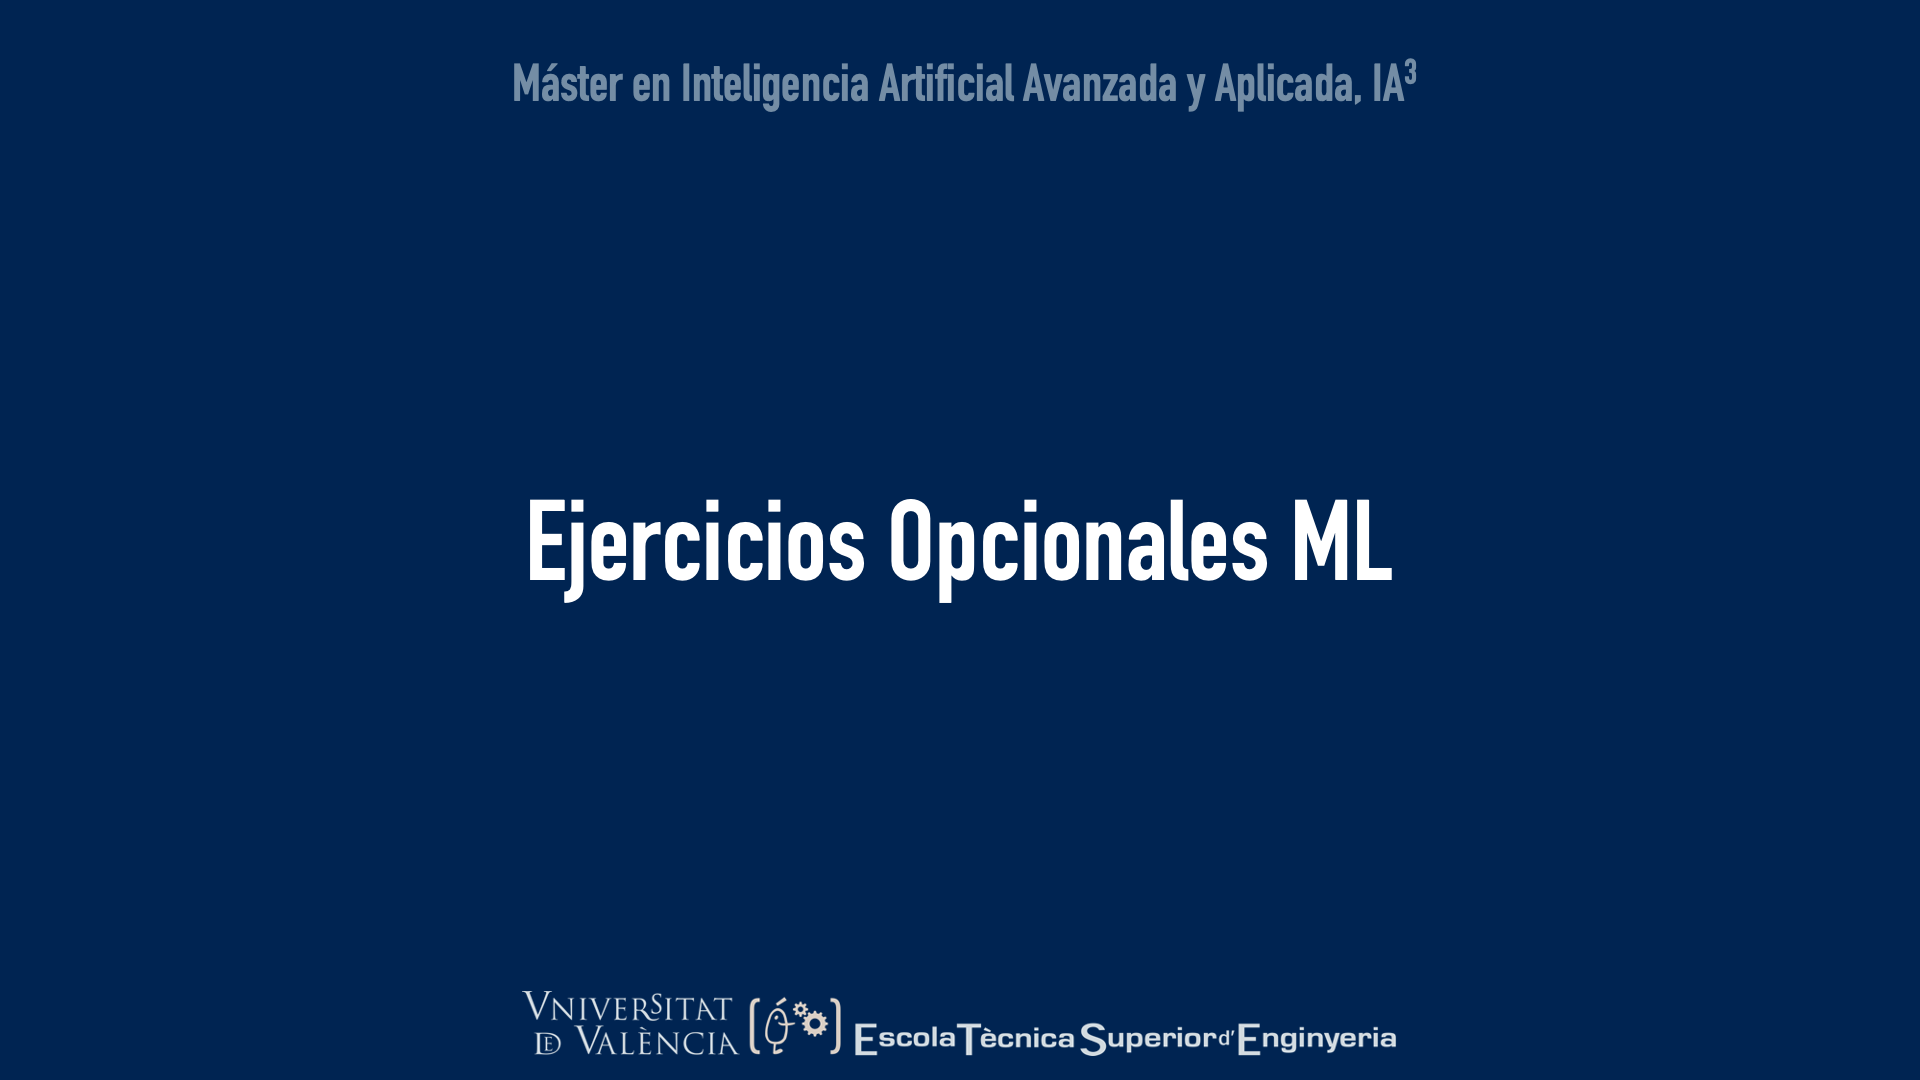

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

## Cargamos el Dataset y mostramos sus 5 primeras filas

In [14]:
dataset = sns.load_dataset("penguins")
dataset.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Vemos el tamaño del dataset

In [15]:
dataset.shape

(344, 7)

## Mostramos una tabla con diferentes estadísticas descriptivas

In [16]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Comprobamos si hay datos nulos

In [17]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Al observar que tenemos datos nulos pasamos a eliminarlos y volvemos a comprobar

In [18]:
dataset.dropna(inplace=True)
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Separamos las caracteristicas de la variable target en dos dataframe distintos
### - Creamos el dataframe ("nuestra matriz X") donde tenemos las características

In [19]:
X=dataset.drop(columns='sex')
X

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


### - En el dataframe de las características ('X') se observan dos características categoricas ('species' y 'island'). 
###  - Observamos sus valores unicos

In [20]:
X['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [21]:
X['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

###  - Convertimos estas variables en tipo dummy

In [22]:
X=pd.get_dummies(X)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0


### - Creamos el dataframe con la variable target ('Y')

In [23]:
Y=dataset.loc[:,['sex']]
Y

,sex
0,Male
1,Female
2,Female
4,Female
5,Male
...,...
338,Female
340,Female
341,Male
342,Female


## Vamos a ver las correlaciones de las características

In [24]:
X.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,-0.836409,0.449098,0.488256,0.225174,0.032118,-0.367821
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.531342,0.323505,-0.822293,-0.626230,0.457326,0.265173
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,-0.685947,-0.186175,0.866854,0.601126,-0.425459,-0.273304
body_mass_g,0.589451,-0.472016,0.872979,1.000000,-0.550479,-0.298622,0.821178,0.623702,-0.464666,-0.251369
species_Adelie,-0.836409,0.531342,-0.685947,-0.550479,1.000000,-0.447597,-0.658904,-0.332518,0.013443,0.458786
species_Chinstrap,0.449098,0.323505,-0.186175,-0.298622,-0.447597,1.000000,-0.377744,-0.496022,0.661894,-0.205351
species_Gentoo,0.488256,-0.822293,0.866854,0.821178,-0.658904,-0.377744,1.000000,0.761548,-0.570702,-0.302296
island_Biscoe,0.225174,-0.626230,0.601126,0.623702,-0.332518,-0.496022,0.761548,1.000000,-0.749398,-0.396949
island_Dream,0.032118,0.457326,-0.425459,-0.464666,0.013443,0.661894,-0.570702,-0.749398,1.000000,-0.310248
island_Torgersen,-0.367821,0.265173,-0.273304,-0.251369,0.458786,-0.205351,-0.302296,-0.396949,-0.310248,1.000000


## Vamos a comprobar si tenemos clases desbalanceadas en la variable target
### - Primero observamos los valores unicos de la target 

In [25]:
Y['sex'].unique()

array(['Male', 'Female'], dtype=object)

### - Hacemos una visualización de barras para ver si hay desbalanceo

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



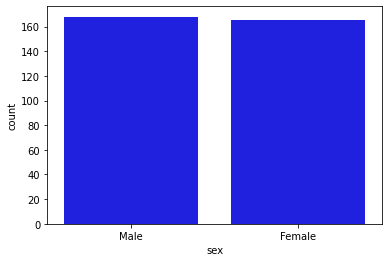

In [26]:
sns.countplot(Y['sex'],color='b')


### Vemos en la gráfica que las clases estan balanceadas

## Vamos a visualizar algunas gráficas de las características para ver como estan distribuidos los datos y ver que características tienen un poder predictivo para clasificar

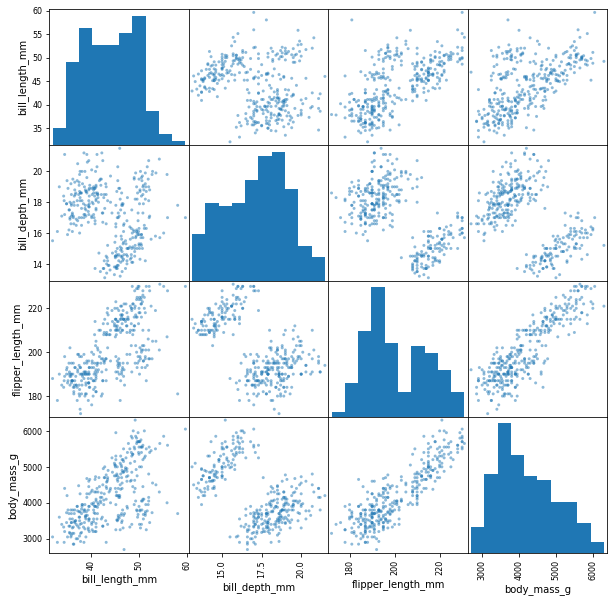

In [27]:
pd.plotting.scatter_matrix(dataset, figsize=(10.0,10.0)); 

In [28]:
fig = px.scatter(dataset, x="bill_depth_mm", y="body_mass_g" , color="sex")
fig.show()

In [29]:
fig = px.scatter(dataset, x="bill_depth_mm", y="flipper_length_mm" , color="sex")
fig.show()

In [30]:
fig = px.scatter(dataset, x="body_mass_g", y="flipper_length_mm" , color="sex")
fig.show()

## Dibujamos Boxplots de la variables numericas para ver los outliers

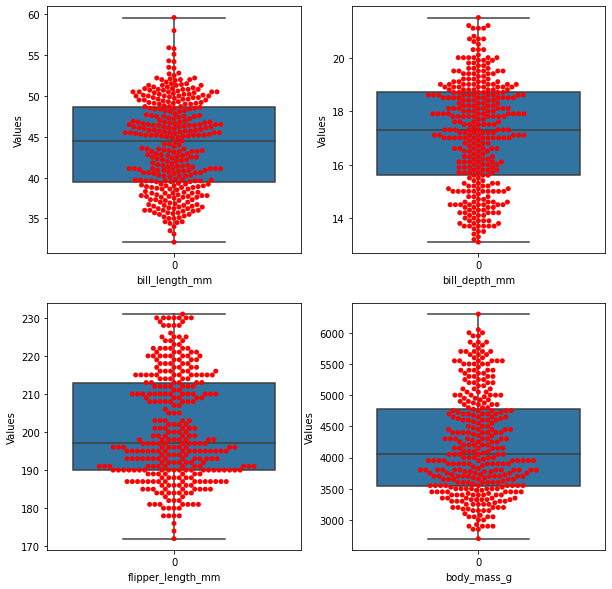

In [31]:
f, axes = plt.subplots(2, 2,figsize=(10, 10))

sns.boxplot(data=X['bill_length_mm'] ,ax=axes[0,0])
sns.swarmplot(data=X['bill_length_mm'],color='r', ax=axes[0,0])
axes[0,0].set(xlabel='bill_length_mm', ylabel='Values')

sns.boxplot(data=X['bill_depth_mm'], ax=axes[0,1])
sns.swarmplot(data=X['bill_depth_mm'],color='r', ax=axes[0,1])
axes[0,1].set(xlabel='bill_depth_mm', ylabel='Values')


sns.boxplot(data=X['flipper_length_mm'], ax=axes[1,0])
sns.swarmplot(data=X['flipper_length_mm'],color='r', ax=axes[1,0])
axes[1,0].set(xlabel='flipper_length_mm', ylabel='Values')

sns.boxplot(data=X['body_mass_g'], ax=axes[1,1])
sns.swarmplot(data=X['body_mass_g'],color='r', ax=axes[1,1])
axes[1,1].set(xlabel='body_mass_g', ylabel='Values')
plt.show()

## Train Test Split

In [126]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

## Normalizamos las variables numericas
### - Aplicamos el StandardScaler de Sklearn a X_train

In [127]:
scaler=StandardScaler()
scaler.fit(X_train.iloc[:,0:4])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [128]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train.iloc[:,0:4]),index=X_train.iloc[:,0:4].index, columns = X_train.iloc[:,0:4].columns)
X_train_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
338,0.615799,-1.699328,0.885888,0.866591
242,0.484679,-1.288177,0.815538,0.223243
179,1.046625,1.024546,-0.099011,-0.512012
325,0.540873,-0.465876,0.956238,1.571211
41,-0.583019,0.716183,-0.450761,-0.389470
...,...,...,...,...
89,-0.938918,0.921758,-0.802511,-0.757097
22,-1.500865,1.127333,-0.872861,-0.512012
236,-0.358241,-1.802115,0.604489,-0.083113
104,-1.126234,0.818970,-0.591461,-1.584259


### - Concatenemos el Dataframe de las caracteristicas normalizadas y las caracteristicas dummies que teniamos

In [129]:
X_train_scaled=pd.concat([X_train_scaled,X_train.iloc[:,4:]], axis=1)
X_train_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
338,0.615799,-1.699328,0.885888,0.866591,0,0,1,1,0,0
242,0.484679,-1.288177,0.815538,0.223243,0,0,1,1,0,0
179,1.046625,1.024546,-0.099011,-0.512012,0,1,0,0,1,0
325,0.540873,-0.465876,0.956238,1.571211,0,0,1,1,0,0
41,-0.583019,0.716183,-0.450761,-0.389470,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
89,-0.938918,0.921758,-0.802511,-0.757097,1,0,0,0,1,0
22,-1.500865,1.127333,-0.872861,-0.512012,1,0,0,1,0,0
236,-0.358241,-1.802115,0.604489,-0.083113,0,0,1,1,0,0
104,-1.126234,0.818970,-0.591461,-1.584259,1,0,0,1,0,0


### - Aplicamos a las variable numericas de X_test la normalización que hemos hecho en X_train

In [130]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:,0:4]),index=X_test.iloc[:,0:4].index, columns = X_test.iloc[:,0:4].columns)
X_test_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
111,0.316095,1.692666,-0.732161,0.468328
158,0.409752,0.613395,-1.646710,-1.185996
288,-0.077268,-1.442359,1.307988,0.590871
308,0.671994,-1.545146,0.745188,0.805320
185,1.327598,0.921758,0.112039,-0.144385
...,...,...,...,...
131,-0.152194,1.127333,-0.310061,-0.879640
67,-0.526825,1.075939,-0.943211,-0.144385
223,1.140282,-0.928420,1.167288,1.816296
273,1.159014,-1.031208,1.659738,0.958498


### - Concatenemos el Dataframe de las caracteristicas normalizadas de X_test y las caracteristicas dummies que teniamos en X_test

In [131]:
X_test_scaled=pd.concat([X_test_scaled,X_test.iloc[:,4:]], axis=1)
X_test_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
111,0.316095,1.692666,-0.732161,0.468328,1,0,0,1,0,0
158,0.409752,0.613395,-1.646710,-1.185996,0,1,0,0,1,0
288,-0.077268,-1.442359,1.307988,0.590871,0,0,1,1,0,0
308,0.671994,-1.545146,0.745188,0.805320,0,0,1,1,0,0
185,1.327598,0.921758,0.112039,-0.144385,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
131,-0.152194,1.127333,-0.310061,-0.879640,1,0,0,0,0,1
67,-0.526825,1.075939,-0.943211,-0.144385,1,0,0,1,0,0
223,1.140282,-0.928420,1.167288,1.816296,0,0,1,1,0,0
273,1.159014,-1.031208,1.659738,0.958498,0,0,1,1,0,0


## Empezamos a probar modelos de Machine Learning
### - Maquina de Vectores

In [132]:
X_train_scaled_2=X_train_scaled[['bill_depth_mm','flipper_length_mm']]
X_train_scaled_2                        

,bill_depth_mm,flipper_length_mm
338,-1.699328,0.885888
242,-1.288177,0.815538
179,1.024546,-0.099011
325,-0.465876,0.956238
41,0.716183,-0.450761
...,...,...
89,0.921758,-0.802511
22,1.127333,-0.872861
236,-1.802115,0.604489
104,0.818970,-0.591461


In [133]:
param_grid = {'kernel':['linear','poly','rbf'],'C': [1,2,3], 'gamma': ['scale',1,5]}
model = SVC()
                                      #metrica           #nº de splits
cv = GridSearchCV(model, param_grid)


In [134]:
cv.fit(X_train_scaled_2, y_train)
cv.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

{'mean_fit_time': array([0.00395794, 0.00264478, 0.00288272, 0.00243683, 0.00276527,
        0.00266824, 0.00251212, 0.03032198, 0.00324097, 0.00257993,
        0.00265856, 0.0028275 , 0.003126  , 0.00334115, 0.00288868,
        0.002458  , 0.0613626 , 0.0031075 , 0.00262675, 0.00345316,
        0.0028141 , 0.00253348, 0.0036293 , 0.00337491, 0.00290227,
        0.08585978, 0.0031889 ]),
 'mean_score_time': array([0.00133467, 0.00103431, 0.00111523, 0.00099421, 0.00109658,
        0.00105429, 0.00105371, 0.0013679 , 0.00122437, 0.00102158,
        0.00104227, 0.00108967, 0.00136104, 0.00107741, 0.00117941,
        0.00099669, 0.00145888, 0.00116425, 0.00103822, 0.00117865,
        0.0010694 , 0.00101495, 0.00118403, 0.0014329 , 0.00122061,
        0.00133972, 0.00117149]),
 'mean_test_score': array([0.7961945 , 0.79143763, 0.82843552, 0.7961945 , 0.77315011,
        0.80528541, 0.7961945 , 0.78234672, 0.82832981, 0.79154334,
        0.77748414, 0.81448203, 0.79154334, 0.77315011, 0.805

In [135]:
cv.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [136]:
X_test_scaled_2=X_test_scaled[['bill_depth_mm','flipper_length_mm']]
X_test_scaled_2

,bill_depth_mm,flipper_length_mm
111,1.692666,-0.732161
158,0.613395,-1.646710
288,-1.442359,1.307988
308,-1.545146,0.745188
185,0.921758,0.112039
...,...,...
131,1.127333,-0.310061
67,1.075939,-0.943211
223,-0.928420,1.167288
273,-1.031208,1.659738


In [137]:
print('Accuaracy train: ',cv.best_estimator_.score(X_train_scaled_2, y_train))
print('Accuaracy test: ',cv.best_estimator_.score(X_test_scaled_2, y_test))
print('F1 score: ',f1_score(y_test,cv.best_estimator_.predict(X_test_scaled_2),average=None))
print('Recall: ',recall_score(y_test,cv.best_estimator_.predict(X_test_scaled_2),average=None))
print('Precision: ',precision_score(y_test,cv.best_estimator_.predict(X_test_scaled_2),average=None))

Accuaracy train:  0.8333333333333334
Accuaracy test:  0.8205128205128205
F1 score:  [0.7961165  0.83969466]
Recall:  [0.77358491 0.859375  ]
Precision:  [0.82       0.82089552]


In [138]:
cv2 = GridSearchCV(model, param_grid)
cv2.fit(X_train_scaled, y_train)
cv2.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

{'mean_fit_time': array([0.00332975, 0.00301237, 0.00360975, 0.00301118, 0.00361309,
        0.00384707, 0.00273323, 0.00633588, 0.00391779, 0.00292516,
        0.00289464, 0.00304294, 0.00285554, 0.00371065, 0.00328298,
        0.00303979, 0.00691533, 0.00413284, 0.00292015, 0.00285382,
        0.00306721, 0.00281324, 0.00426445, 0.00368032, 0.00314922,
        0.0065927 , 0.00417361]),
 'mean_score_time': array([0.00118294, 0.00117388, 0.00136685, 0.00125837, 0.00114193,
        0.00162663, 0.00114212, 0.00151906, 0.00129642, 0.00114417,
        0.00111609, 0.00115762, 0.00109863, 0.00111189, 0.00120792,
        0.00109105, 0.00122652, 0.0013936 , 0.00111432, 0.00111589,
        0.00123987, 0.00108323, 0.00149493, 0.0024158 , 0.00118484,
        0.00142732, 0.00146275]),
 'mean_test_score': array([0.88868922, 0.88393235, 0.89788584, 0.88868922, 0.87019027,
        0.89323467, 0.88868922, 0.85634249, 0.86067653, 0.89809725,
        0.87008457, 0.89788584, 0.89809725, 0.87008457, 0.884

In [139]:
cv2.best_estimator_

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
print('Accuaracy train: ',cv2.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv2.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,cv2.best_estimator_.predict(X_test_scaled),average=None))
print('Recall: ',recall_score(y_test,cv2.best_estimator_.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,cv2.best_estimator_.predict(X_test_scaled),average=None))

Accuaracy train:  0.9212962962962963
Accuaracy test:  0.9230769230769231
F1 score:  [0.91262136 0.93129771]
Recall:  [0.88679245 0.953125  ]
Precision:  [0.94       0.91044776]


In [141]:
#Transform into probabilities
#tenemos que pasar las clases a propabilidades.
#hemos hecho que cuando sea Male es un 100% de Male
# y cuando sea Female estoy 0% seguro de que no es de esta clase
#es comoq ue estamos 100%seguro de cual es cual
new_probs = []
for value in y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)


#hacemos predicciones de probabilidad (cogemos la segunda columna xq es la de Male que es la que hemos puesto como 100%)  
#fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
fpr, tpr, thresholds = roc_curve(new_probs, cv2.best_estimator_.predict_proba(X_test_scaled)[:,1], drop_intermediate=False)#sin hacerlo lista tb funciona
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

print('AUC: ',roc_auc_score(new_probs, cv2.best_estimator_.predict_proba(X_test_scaled)[:,1]))

fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

AttributeError: ignored

### - RandomForest

In [142]:
param_grid = {'n_estimators':[10,50,100],'max_samples': [30,60,90], 'max_features': [2,3,4],'min_samples_split':[4,6,8] , 'criterion': ['entropy','gini'],'bootstrap':[True,False]}
#model = RandomForestClassifier(n_estimators=50, max_samples=60, max_features=4,min_samples_split=4,bootstrap=False,criterion='entropy')
                                      
model = RandomForestClassifier()
cv3 = GridSearchCV(model, param_grid)

In [144]:
cv3.fit(X_train_scaled, y_train)
cv3.cv_results_

Se han truncado las últimas 5000 líneas del flujo de salida.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: Da

{'mean_fit_time': array([0.01571651, 0.06656251, 0.12738347, 0.01677165, 0.0646852 ,
        0.12231917, 0.01491942, 0.06205478, 0.12443972, 0.01537881,
        0.06385255, 0.1288579 , 0.01457319, 0.06613474, 0.12418213,
        0.01524234, 0.0624125 , 0.12951965, 0.01480808, 0.06535082,
        0.12954803, 0.0154376 , 0.06825905, 0.12526784, 0.01477013,
        0.07014022, 0.12647572, 0.01526656, 0.06515388, 0.12719326,
        0.01538582, 0.06317086, 0.1261313 , 0.01651063, 0.0609942 ,
        0.1262712 , 0.01522422, 0.0643734 , 0.12961884, 0.01476064,
        0.06598396, 0.13169184, 0.01535401, 0.0647778 , 0.12776217,
        0.01572604, 0.0656713 , 0.1321682 , 0.01527925, 0.0727828 ,
        0.12715526, 0.01622219, 0.06759448, 0.12989721, 0.01527686,
        0.06419806, 0.13100753, 0.01488805, 0.06178918, 0.12546425,
        0.01429038, 0.06189528, 0.12928252, 0.01525803, 0.06429877,
        0.13242049, 0.01603251, 0.06741576, 0.12977443, 0.01551399,
        0.06777668, 0.12705555,

In [145]:
cv3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
print('Accuaracy train: ',cv3.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv3.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,cv3.best_estimator_.predict(X_test_scaled),average=None))
print('Recall: ',recall_score(y_test,cv3.best_estimator_.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,cv3.best_estimator_.predict(X_test_scaled),average=None))

Accuaracy train:  0.9444444444444444
Accuaracy test:  0.9145299145299145
F1 score:  [0.90909091 0.91935484]
Recall:  [0.94339623 0.890625  ]
Precision:  [0.87719298 0.95      ]


In [147]:
#Transform into probabilities
#tenemos que pasar las clases a propabilidades.
#hemos hecho que cuando sea Male es un 100% de Male
# y cuando sea Female estoy 0% seguro de que no es de esta clase
#es comoq ue estamos 100%seguro de cual es cual
new_probs = []
for value in y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)


#hacemos predicciones de probabilidad (cogemos la segunda columna xq es la de Male que es la que hemos puesto como 100%)  
#fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
fpr, tpr, thresholds = roc_curve(new_probs, cv3.best_estimator_.predict_proba(X_test_scaled)[:,1], drop_intermediate=False)#sin hacerlo lista tb funciona
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

print('AUC: ',roc_auc_score(new_probs, cv3.best_estimator_.predict_proba(X_test_scaled)[:,1]))

fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

AUC:  0.9711084905660378
